# Bases Computacionais: noções de estatística

Renato Naville Watanabe

## Estatística

A análise estatística pode ser dividida em duas áreas:

- 1) **Estatística descritiva**: Esta interessada na redução, análise e
interpretação dos dados. Pode incluir a construção de gráficos,
tabelas, e computação de várias medidas:medidas de tendência
central (ex. a média), de dispersão (ex. a variância), de
frequência (ex. percentagem), etc.
    + Gráfico com a distribuição da idade dos ingressantes nos bacharelados interdisciplinares da UFABC.

- 2) **Estatística indutiva / inferencial**: Voltada a realizar
estimativas a partir de uma amostra ou testar ideias teóricas
(hipóteses) com dados experimentais.
    + Estimativa da porcentagem da população que votará para um determinado candidato em uma eleição, junto com uma margem de erro (“intervalo de confiança”);
    

## Conceitos básicos

- **População**: População pode ser definido como o conjunto de elementos que têm em comum uma determinada característica.
    + indivíduos com dengue;
    + aparelhos de televisão fabricados em uma fábrica;
   

- **Amostra**: Uma amostra é um subgrupo de uma população, ou seja, é todo subconjunto com menor número de elementos que o conjunto definido como população.

- **Variáveis**: É toda característica que, observada em uma unidade experimental, pode variar de um indivíduo para outro.
    + Exemplos: gênero, cor da pele, altura, idade, salário, nível de hemoglobina no sangue.
    + Podem ser divididas em: Qualitativas e Quantitativas

### Tipos de variáveis

- Qualitativas:
    + **Nominal**: Uma categoria se diferencia da outra somente pela denominação que recebem. Ex.: gênero feminino ou masculino, estado civil, nacionalidade.
    + **Ordinal**: É possível reconhecer graus de intensidade entre as categorias. Ex.: nível sócio-econômico (baixo, médio, alto), avaliação de um serviço (ruim, regular, bom).

- Quantitativas:
    + **Discretas**: São aquelas em que os dados somente podem apresentar determinados valores, em geral, números inteiros.
    Ex.: número de filhos, número de baixas hospitalares.
    + **Contínuas**: Aquelas cujos dados somente podem apresentar qualquer valor dentro de um intervalo de variação possível.
    Ex.: altura, peso, níveis de hemoglobina no sangue.

## Medidas estatísticas

É conveniente dispor de medidas que informem sobre a amostra de maneira mais resumida do que os dados brutos são capazes de fazer. Dão uma visão global dos dados, podendo ser:

- **Tendência central**: São aquelas que produzem um valor em torno do qual os dados observados se distribuem, e que visam sintetizar em um único número o conjunto de dados.
    Ex: Média aritmética, Mediana e Moda.
- **Dispersão**: É a variabilidade que os dados apresentam entre si.
    Ex: Variância, Desvio-padrão e intervalo inter-quartil.

## Medidas de tendência central


São aquelas que produzem um valor em torno do qual os dados observados se distribuem, e que visam sintetizar em um único número o conjunto de dados.

### Média

É a medida de tendência central mais conhecida e usada. É definida com a somatória de todas as amostras e a divisão pelo número de elementos. Normalmente é representada com uma barra em cima do nome da variável ($\bar{x}$).

$$\bar{x} = \frac{x[0]+x[1]+x[2]+...+x[N-1]}{N} = \frac{\displaystyle\sum_{i = 0}^{N-1}x[i]}{N}$$

Como exemplo, vamos considerar os seguintes números: 1.2, 1.7, -0.6, 9, 5.3, 9.2, 1.9 . Podemos guardá-los em um array do Numpy.

In [2]:
import numpy as np

x = np.array([1.2, 1.7, -0.6, 9, 5.3, 9.2, 1.9])


3.957142857142857

A média é a soma desses números divida pela quantidade de valores:

In [4]:
mediaX = np.sum(x)/len(x)
mediaX

3.957142857142857

Uma outra maneira, é utilizar a função `np.mean`:

In [5]:
mediaX = np.mean(x)
mediaX

3.957142857142857

É possível calcular a média de uma coluna de um DataFrame do Pandas.

In [7]:
import pandas as pd

compras = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/compras.csv')
compras

,Produto,Fabricante,Qtd,Medida,Preço,Supermercado,Data
0,Suco,ValeSuco,1,l,3.00,Arpoador,12/05/2011
1,Suco,Flash,1,l,4.50,Arpoador,18/05/2011
2,Tomate,-,1,kg,3.50,Noite,14/05/2011
3,Arroz,Tio José,4,kg,8.64,Noite,14/05/2011
4,Arroz,Sem Broto,5,kg,9.99,Arpoador,10/06/2011
5,Arroz,Da TV,1,kg,1.99,Noite,14/06/2011
6,Feijão,Sem Broto,1,kg,4.00,Arpoador,12/05/2011
7,Tomate,-,1,kg,2.99,Noite,16/05/2011
8,Ovo,A Granja,12,u,3.19,Arpoador,12/06/2011
9,Ovo,Caseiro,6,u,1.45,Noite,14/05/2011


Isso é feito acrescentando '.mean()' após o nome da coluna. Por exemplo, para calcular a média da coluna 'Preços':

In [8]:
mediaPreco = compras['Preço'].mean()
mediaPreco

4.294545454545455

Outro exemplo, para calcular a média da coluna 'Preço' quando a coluna 'Produto' é 'Arroz'.

In [10]:
mediaPrecoArroz = compras.query("Produto == 'Arroz'")[['Preço']].mean()
mediaPrecoArroz

,0
Preço,6.873333


Também é possível calcular a média do conteúdo de uma coluna dividida por algum critério, por exemplo outra coluna, usando a função `groupby`. Por exemplo, a instrução abaixo calcula a média da coluna *Preço* para cada *Fabricante*.

In [12]:
preco_fabricante = compras.groupby('Fabricante')['Preço'].mean()
preco_fabricante

,Preço
Fabricante,
-,3.245
A Granja,3.190
Caseiro,1.450
Da TV,1.990
Flash,4.245
Sem Broto,6.995
Tio José,8.640
ValeSuco,3.000


### Mediana

É definida como o valor que divide as amostras na metade. É necessário que as amostras estejam ordenadas.

Por exemplo, no caso do vetor abaixo:

In [ ]:
import numpy as np

x = np.array([1.2, 1.7, -0.6, 9, 5.3, 9200, 1.9])
x

array([ 1.2e+00,  1.7e+00, -6.0e-01,  9.0e+00,  5.3e+00,  9.2e+03,
        1.9e+00])

Ordenando:

In [ ]:
np.sort(x)

array([-6.0e-01,  1.2e+00,  1.7e+00,  1.9e+00,  5.3e+00,  9.0e+00,
        9.2e+03])

O número que divide as amostras em dois é o 1.9 (três elementos à esquerda e três elementos à direita).

Isso é possível fazer com o comando 'np.median()'. Ao usar o comando np.median

In [14]:
medianaX = np.median(x)
medianaX

1.9

Se o número de amostras for par, a mediana é a média dos dois elementos centrais.

In [16]:
x = np.array([1.2, 1.7, -0.6, 9, 5.3,-3.2, 9.2, 1.9])
np.sort(x)

array([-3.2, -0.6,  1.2,  1.7,  1.9,  5.3,  9. ,  9.2])

A mediana será a média entre 1.7 e 1.9 (1.8).

In [17]:
medianaX = np.median(x)
medianaX

1.7999999999999998

É possível calcular a mediana de um DataFrame do Pandas. Abaixo é mostrado a tabela com todos os jogos do Campeonato Brasileiro de Futebol de 2018.

In [70]:
import pandas as pd
brasileirao = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv')
brasileirao.head()

,Data,Turno,Mandante,Placar do Mandante,Placar do Visitante,Visitante,Estádio,Horário,Gols do Mandante,Gols do Visitante,Público,Árbitro,Renda (R$)
0,14/04/2018,1,Cruzeiro,0,1,Grêmio,"Estádio Mineirão, Belo Horizonte",16:00,NaN,54' André,15446,PR Rodolpho Toski Marques,418305.0
1,14/04/2018,1,Vitória,2,2,Flamengo,"Estádio Barradão, Salvador",19:00,Yago 13' (pen) Denílson 76',1' Lucas Paquetá 72' Réver,12669,MT Wagner Reway,238994.0
2,14/04/2018,1,Santos,2,0,Ceará,"Estádio do Pacaembu, São Paulo",21:00,Pio 41' Rodrygo 49',NaN,12268,SC Rodrigo D'Alonso Ferreira,526550.0
3,15/04/2018,1,América Mineiro,3,0,Sport,"Estádio Independência, Belo Horizonte",11:00,"Serginho 1', 40' Carlinhos 36'",NaN,3230,DF Sávio Pereira Sampaio,36293.0
4,15/04/2018,1,Internacional,2,0,Bahia,"Estádio Beira-Rio, Porto Alegre",16:00,"Nico López 37', 60'",NaN,18460,GO Eduardo Tomaz de Aquino Valadão,796275.0


Para calcular a mediana de uma coluna, basta acrescentar '.median()' após a chamada da coluna. Por exemplo, abaixo são calculadas a mediana e a média de Público dos jogos:

In [71]:
medianaPublico = brasileirao['Público'].median()
mediaPublico = brasileirao['Público'].mean()
print(f'A média de público é {mediaPublico} e a mediana de público é {medianaPublico}')

A média de público é 18863.31842105263 e a mediana de público é 14689.5


Um outro exemplo, para calcular a mediana da coluna 'Público' nos itens em que a coluna 'Mandante' seja 'Corinthians':

In [73]:
medianaPublicoCorinthians = brasileirao.query("Mandante == 'Corinthians'")['Público'].median()
medianaPublicoCorinthians

29371.0

Também é possível calcular a mediana do conteúdo de uma coluna dividida por algum critério, por exemplo outra coluna, usando a função groupby. Por exemplo, a instrução abaixo calcula a mediana da coluna *Público* para cada time *Mandante*.

In [75]:
brasileirao.groupby('Mandante')['Público'].median()

,Público
Mandante,
América Mineiro,4062.0
Atlético Mineiro,18688.0
Atlético Paranaense,9204.0
Bahia,17448.0
Botafogo,8498.0
Ceará,29186.0
Chapecoense,8075.0
Corinthians,29371.0
Cruzeiro,13160.0


### Moda

É o elemento mais comum entre as amostras. É a única medida de tendência central que pode ser usada em variáveis qualitativas.

No Pandas, existe a função 'mode()'. Por exemplo, para saber qual o árbitro que mais apitou no Campeonato Brasilero de Futebol de 2018:

In [76]:
brasileirao['Árbitro'].mode()

,Árbitro
0,SP Raphael Claus


Um outro exemplo mais complexo. Na tabela abaixo estão as visualizações de um usuário do Netflix, com as datas. O objetivo é saber qual o mês que mais se viu no Netflix.

In [25]:
netflix = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/netflix.csv')
netflix

,Title,Date
0,Meu Amigo Totoro,23/07/2024
1,Peppa Pig: Temporada 5: A Cidade da Batata / A...,30/06/2024
2,Peppa Pig: Temporada 4: O computador do Vovô P...,29/06/2024
3,Ponyo - Uma Amizade que Veio do Mar,22/06/2024
4,O Serviço de Entregas da Kiki,17/06/2024
...,...,...
973,Os miseráveis,07/07/2013
974,Além da imaginação (Série original): Temporada...,07/07/2013
975,Além da imaginação (Série original): Temporada...,05/07/2013
976,Jogos Vorazes,05/07/2013


Primeiro se cria uma coluna com o mês.

In [26]:
netflix['Date']=pd.to_datetime(netflix['Date'], format="%d/%m/%Y")
netflix['Mês'] = netflix['Date'].dt.month_name()
netflix

,Title,Date,Mês
0,Meu Amigo Totoro,2024-07-23,July
1,Peppa Pig: Temporada 5: A Cidade da Batata / A...,2024-06-30,June
2,Peppa Pig: Temporada 4: O computador do Vovô P...,2024-06-29,June
3,Ponyo - Uma Amizade que Veio do Mar,2024-06-22,June
4,O Serviço de Entregas da Kiki,2024-06-17,June
...,...,...,...
973,Os miseráveis,2013-07-07,July
974,Além da imaginação (Série original): Temporada...,2013-07-07,July
975,Além da imaginação (Série original): Temporada...,2013-07-05,July
976,Jogos Vorazes,2013-07-05,July


E finalmente se usa a função mode para saber o mês em que o usuário mais viu filmes e  séries no Netflix.

In [27]:
netflix['Mês'].mode()

,Mês
0,March


## Medidas de dispersão

O processo de trabalhar com dados introduz uma variabilidade nos resultados obtidos,  pois cada individuo de uma amostra vai ter características ligeiramente diferentes.

Essa variabilidade é medida através das medidas de dispersão.

Dentre as medidas de dispersão tem-se:

- **Variância**
- **Desvio-padrão**
- **Percentil**

### Variância

Para explicar a variância, vamos considerar um conjunto de valores, descritos abaixo.

$$
\begin{array}{|c|}
    \hline
    \text{Valores de } x\\
    \hline
    0&\\
    5&\\
    8&\\
    -2&\\
    -10&\\
    2&\\
    \hline
    \hline
    \bar{x} = 0.5\\
    \hline
\end{array}
$$

A média da amostra é 0,5.

É possível ver a dispersão dos valores em torno da média.

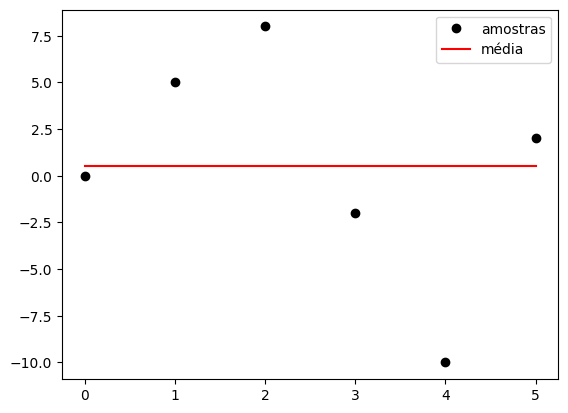

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x = np.array([0,5,8,-2,-10,2])
mediaX = np.mean(x)

plt.figure()
plt.plot(np.linspace(0,5,6), x, marker = 'o', linestyle = '', label='amostras',
         color = 'black')
plt.plot(np.linspace(0,5,6), mediaX*np.ones((6)), marker = '',
         linestyle = '-', color = 'red', label='média')
plt.legend()
plt.show()

Podemos calcular o quanto cada elemento desvia da média da amostra.

$$
\begin{array}{|c|c|}
    \hline
    \text{Valores de } x&\text{Desvio } (x - \bar{x})\\
    \hline
    0&-0.5\\
    5&4.5\\
    8&7.5\\
    -2&-2.5\\
    -10&-10.5\\
    2&1.5\\
    \hline
    \hline
    \bar{x} = 0.5&\displaystyle\sum (x-\bar{x}) = 0\\
    \hline
\end{array}
$$

Num primeiro momento, podemos achar que a soma é uma boa medida da dispersão dos valores da amostra. Porém os desvios negativos cancelam os desvios positivos. Por exemplo, no exemplo acima a soma dos desvios é zero, mas observando o gráfico anterior zero claramente não é um bom número para representar a dispersão dos valores (zero seria um bom número se todos os valores da amostra tivessem o mesmo valor).

Isso faz com que seja necessário elevar ao quadrado os desvios. Isso faz com os valores das diferenças fiquem positivos.

Com isso é possível definir a variância.

**Variância** é definida como a somatória dos desvios da média elevados ao quadrado dividia pelo número de elementos menos um.

$$
\begin{array}{|c|c|c|}
    \hline
    \text{Valores de } x&\text{Desvio } (x - \bar{x})&\text{Desvio ao quadrado } (x-\bar{x})^2\\
    \hline
    0&-0.5&0.25\\
    5&4.5&20.25\\
    8&7.5&56.25\\
    -2&-2.5&6.25\\
    -10&-10.5&110.25\\
    2&1.5&2.25\\
    \hline
    \hline
    \bar{x} = 0.5&\displaystyle\sum (x-\bar{x}) = 0&\displaystyle\sum (x-\bar{x})^2 = 195.5\\
    \hline
\end{array}
$$

Observe que a soma dos desvios é igual a zero. Isso aconteceu pelo cancelamento que os desvios negativos causam nos desvios positivos. Por isso a necessidade de elevar ao quadrado para ter uma real medida dos desvios das amostras.

Então, a expressão da variância amostral, representada por $S^2$, é:

$$Variance = S^2 = \frac{\displaystyle\sum_{i=0}^{N-1}(x-\bar{x})^2}{N-1} $$

Para calcular a variância dos elementos em um vetor x do Numpy, usa-se 'np.var(x, ddof=1)'.

In [30]:
varianceX = np.var(x, ddof=1)
varianceX

39.1

Também é possível calcular a variância de uma coluna de um DataFrame do Pandas.

Para calcular a variância da altura dos participantes de um experimento que tem as características de seus partipantes no arquivo `https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/BDSinfo.csv`, basta acrescentar `.var()` após a seleção da coluna desejada ('Height' nesse caso). Esse arquivo, diferentemente dos arquivos padrão CSV, tem as colunas separadas por uma tabulação. Por isso é necessário acrescentar `sep='\t'` na função `read_csv`:

In [55]:
tabela = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/BDSinfo.csv', sep='\t')
tabela


,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,...,Best_7,Best_8,Best_9,Best_10,Best_11,Best_12,Best_13,Best_14,Best_T,Date
0,BDS00001,1,Open,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
1,BDS00002,1,Open,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
2,BDS00003,1,Open,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
3,BDS00004,1,Closed,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
4,BDS00005,1,Closed,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,BDS01952,163,Open,Firm,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1926,BDS01953,163,Open,Firm,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1927,BDS01954,163,Closed,Foam,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1928,BDS01955,163,Closed,Foam,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538


In [61]:
print(f"A variância da altura é {tabela['Height'].var()} cm²")

A variância da altura é 93.0031902513316 cm²


### Desvio-padrão

O desvio-padrão é a raiz quadrada da variância.

$$S = \sqrt{\frac{\displaystyle\sum_{i=0}^{N-1}(x-\bar{x})^2}{N-1}}$$

A medida mais utilizada para descrever a dispersão das amostras é o desvio-padrão, já que ele tem a mesma unidade das amostras (a variância tem a unidade das amostras ao quadrado).

Para calcular o desvio-padrão dos valores de uma coluna de um DataFrame do Pandas basta acrescentar '.std()' ao nome da coluna.

In [35]:
tabela['Height'].std()

9.643816166400706

Uma maneira muito comum de representar a média e o desvio-padrão de uma amostra é representar a média com uma linha e outras duas linhas, cada uma com  o valor de $\bar{x}+S$ e $\bar{x}-S$. Isso permite visualizar qual o intervalo a amostra em análise se distribui.

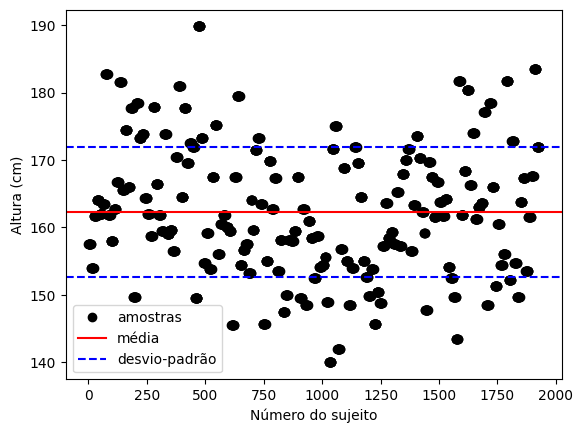

In [62]:
stdX = tabela['Height'].std()

plt.figure()
plt.plot(np.arange(0,len(tabela)), tabela['Height'], marker = 'o', linestyle = '', label='amostras', color = 'black')
plt.axhline(tabela['Height'].mean(), marker = '',
         linestyle = '-', color = 'red', label='média')
plt.axhline(tabela['Height'].mean() + stdX, marker = '',
         linestyle = '--', color = 'blue', label='desvio-padrão')
plt.axhline(tabela['Height'].mean() - stdX, marker = '',
         linestyle = '--', color = 'blue')
plt.legend()
plt.ylabel('Altura (cm)')
plt.xlabel('Número do sujeito')
plt.show()

### Percentil

Uma outra maneira de mostrar a dispersão do dado é usando os percentis. Para encontrar os percentis, podemos dividir a sua amostra em 100 partes após ordenar a amostra do menor valor para o maior valor. O percentil 1 (1 % do dado) será o valor encontrado na primeira parte. O percentil 50 é o valor encontrado na quinquagésima parte (e é igual a mediana). Podemos encontrar o percentil usando o comando quantile(p), em que p é o percentil, dado de 0 a 1 (1 é 100 %, 0,5 é 50%, 0,01 é 1% e assim por diante).

Por exemplo, o percentil 25 da altura dos participantes é:

In [38]:
tabela['Height'].quantile(0.25)

155.0

Aqui é mostrado o dado da Renda dos jogos com as linhas mostrando os percentis 25%, 50%, 75% e 90%. Isso permite que se tenha uma ideia da distribuição do dado.

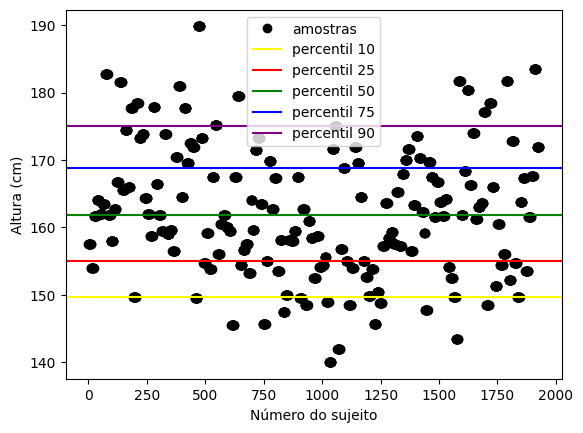

In [44]:
plt.figure()
plt.plot(np.arange(0,len(tabela)), tabela['Height'], marker = 'o',
         linestyle = '', label='amostras', color='black')
plt.axhline(tabela['Height'].quantile(0.1), marker='', linestyle='-', color = 'yellow', label='percentil 10')
plt.axhline(tabela['Height'].quantile(0.25), marker='', linestyle='-', color = 'red', label='percentil 25')
plt.axhline(tabela['Height'].quantile(0.5), marker='', linestyle='-', color = 'green', label='percentil 50')
plt.axhline(tabela['Height'].quantile(0.75), marker='', linestyle='-', color = 'blue', label='percentil 75')
plt.axhline(tabela['Height'].quantile(0.9), marker='', linestyle='-', color = 'purple', label='percentil 90')
plt.legend()
plt.ylabel('Altura (cm)')
plt.xlabel('Número do sujeito')
plt.show()

Usando a função `describe()`, é possível obter as diferentes medidas descritivas dobre o dado de uma coluna de uma tabela. Por exemplo, para os dados da altura:

In [50]:
tabela['Height'].describe()

,Height
count,1930.000000
mean,162.340052
std,9.643816
min,140.000000
25%,155.000000
50%,161.800000
75%,168.800000
max,189.800000


## Gráficos

### Histograma

O histograma é um tipo de gráfico que permite visualizar a forma da distribuição dos valores dos elementos de uma amostra.

Para construir um histograma, divide-se a faixa numérica da variável em intervalos. Em seguida, são contadas quantos elementos estão em cada intervalo.

É possível construir um histograma com o comando do matplotlib `plt.hist(x)`, em que x é o vetor contendo os elementos da sua amostra.

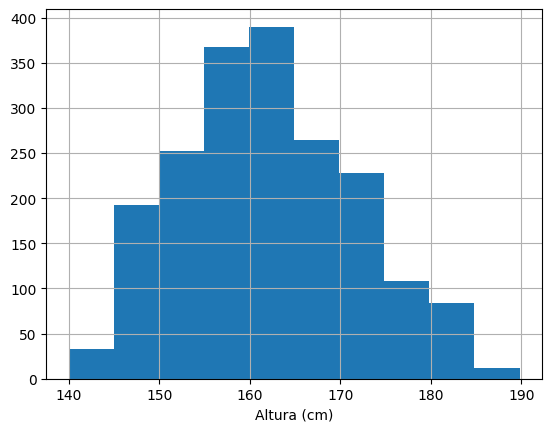

In [45]:
plt.figure()
plt.hist(tabela['Height'])
plt.xlabel('Altura (cm)')
plt.grid()
plt.show()

Outra maneira de construir um histograma é, a partir de um DataFrame do Pandas, adicionar `.hist()`.

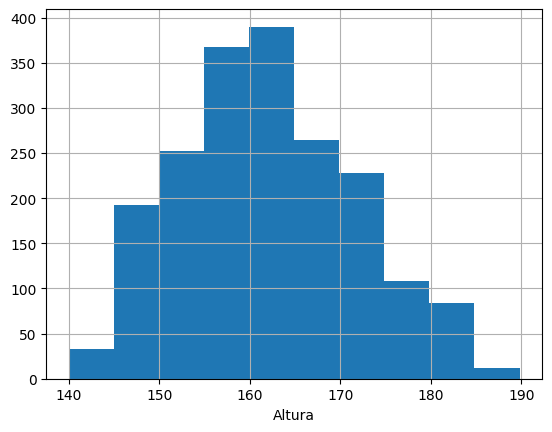

In [46]:
plt.figure()
tabela['Height'].hist()
plt.xlabel('Altura')
plt.show()

Um outro exemplo, agora do peso dos participantes.

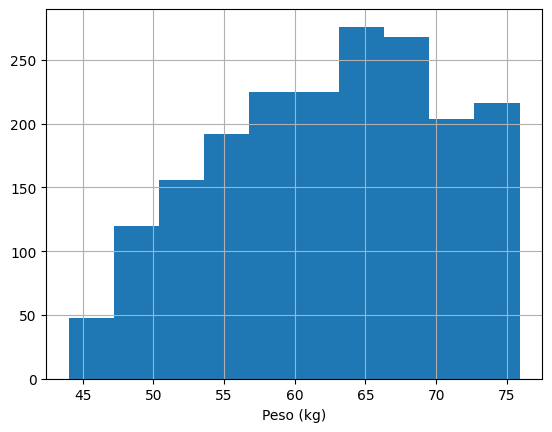

In [48]:
plt.figure()
tabela['Weight'].hist()
plt.xlabel('Peso (kg)')
plt.show()

### Boxplot

Um outro tipo de gráfico que mostra a dispersão do dado é o boxplot. Ele mostra diversos elementos:

- A linha dentro da caixa é a mediana do dado (percentil 50)
- A linha do limite inferior da caixa  é o percentil 25 (conhecido também como quartil 1 ou Q1)
- A linha do limite superior da caixa é o percentil 75 (conhecido também como quartil 3 ou Q3
- A linha de cima é o valor $Q_3 + 1,5(Q3-Q1)$
- A linha de baixo é o valor $Q_1 - 1,5(Q3-Q1)$
- Os pontos acima da linha superior e abaixo da linha inferior são os outliers (pontos discrepantes). Os outliers normalmente são interpretados como não sendo parte do resto do conjunto. Em muitas análises os outliers são descartados.


É possível fazer um boxplot usando o comando boxplot('nome_da_coluna') após o nome do Dataframe do Pandas.

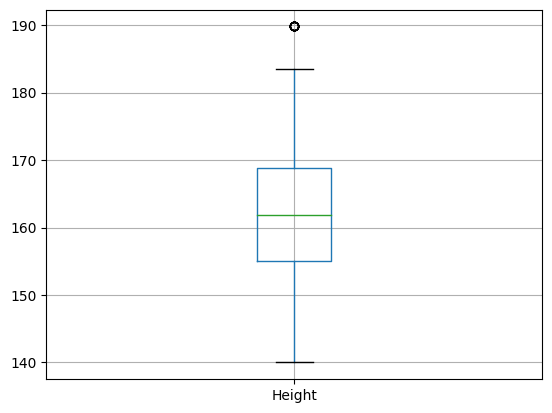

In [51]:
plt.figure()
tabela.boxplot('Height')
plt.show()

### Quando não usar a média como medida de tendência central

Quando temos valores que distoam muito da maioria (esses pontos são conhecidos como 'outliers') não devemos usar a média.

Por exemplo, se tivermos os seguintes valores:

In [ ]:
x = np.array([-2.5, -4.3, -7.1, -6.2, -4.1, 0.2])

A média e a mediana são muito próximas uma da outra. Qualquer uma das medidas poderiam ser utilizadas como medida de tendência central.

In [ ]:
print(f'Média de x é {np.mean(x):.2f}')
print(f'Mediana de x é {np.median(x):.2f}')

Média de x é -4.00
Mediana de x é -4.20


Agora, acrescentando um valor muito diferente do resto do conjunto:

In [ ]:
x = np.array([-2.5, -4.3, -7.1, -6.2, -4.1, 0.2, 105.3])

A média e a mediana são valores muito diferentes. Nesse caso, a média não é representativa do conjunto enquanto a mediana é.

In [ ]:
print(f'Média de x é {np.mean(x):.2f}')
print(f'Mediana de x é {np.median(x):.2f}')

Média de x é 11.61
Mediana de x é -4.10


Uma outra situação é quando a distribuição dos dados não for simétrica. Isso é possível de se ver usando tanto o histograma quanto o boxplot.



Uma das colunas que a tabela com as informações demográficas  tem é o tamanho do pé da pessoa, em cm (FootLen). Se fizermos o histograma e o boxplot, vemos que o dado se distribui de forma razoavelmente simétrica em torno do pico do histograma e em torno da mediana no boxplot.

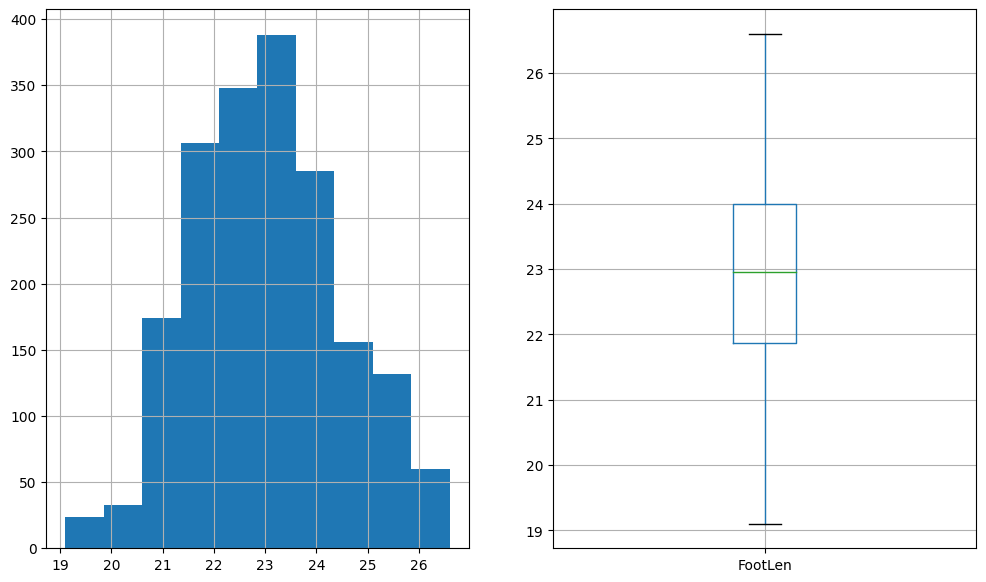

In [52]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
tabela['FootLen'].hist()
plt.subplot(1,2,2)
tabela.boxplot('FootLen')
plt.show()

Nesse caso, a média e a mediana são aproximadamente iguais.

In [54]:
print(f"média = {tabela['FootLen'].mean()}")
print(f"mediana = {tabela['FootLen'].median():.2f}")

média = 22.97355718782791
mediana = 22.95


Já neste caso abaixo, considerando a coluna `Renda (R$)` dos jogo do cameponato Brasileiro de 2018, os dados além de serem bastante assimétricos em torno do pico do histograma, têm vários outliers, mostrados no boxplot.

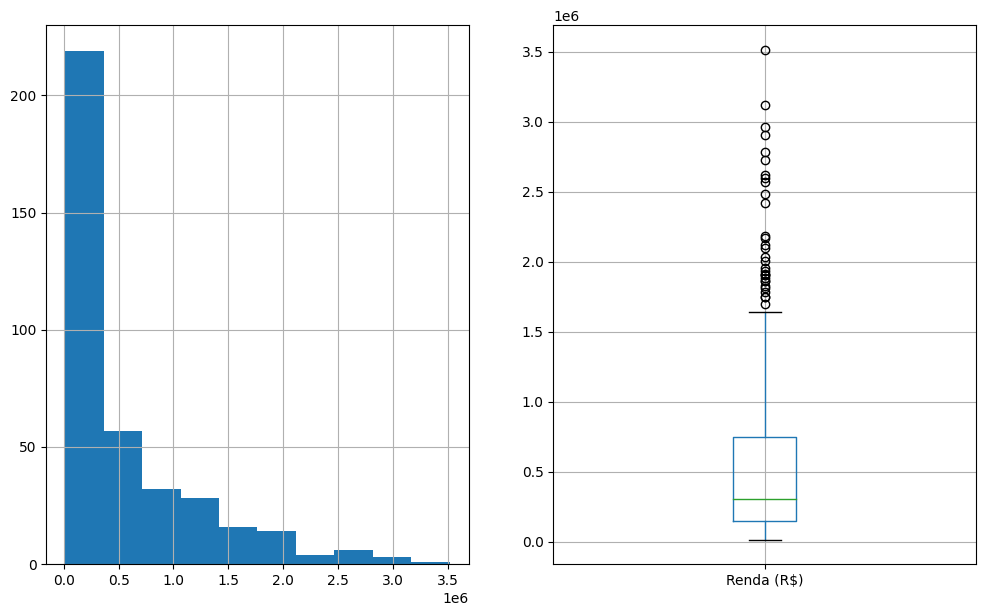

In [77]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
brasileirao['Renda (R$)'].hist()
plt.subplot(1,2,2)
brasileirao.boxplot('Renda (R$)')
plt.show()

Neste caso, a média e a mediana são bem diferentes, mas claramente o valor da mediana é uma medida melhor da tendência central do dado (mais próximo do pico do histograma).

In [79]:
print(f"média = {brasileirao['Renda (R$)'].mean():.2f}")
print(f"mediana = {brasileirao['Renda (R$)'].median():.2f}")

média = 570256.19
mediana = 302502.50


### Exercícios

- Escrever um notebook do Colab para fazer o que pedido a seguir.



**1)** Para este item você deverá usar o arquivo [com todos os resultados do campeonato Brasileiro de futebol de 2018](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv).


- Escolha um time e faça o histograma da distribuição do público nos jogos em que este time foi o mandante.

- Calcule qual foi o público médio nos jogos em que o time escolhido foi o mandante.

**2)** Para este item você deverá usar o arquivo [com dados de força e torque medidos no chão enquanto uma pessoa tenta ficar em pé durante um minuto](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/balance.csv).

- Faça o gráfico do torque na direção y (My [Nm]) em função do tempo (Time [s]).

- Mostre na tela a média e o desvio-padrão do torque na direção y.

**3)**  Para este item você deverá usar o arquivo com a [taxa de inflação mensal (IGP-DI) no Brasil de fevereiro de 1944 a junho de 2019](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/inflacaoMensal.csv) (dados disponibilizados por Ipeadata).

- Calcule a mediana da inflação mensal nos meses de março.

- Calcule a média da inflação mensal nos meses de março.

- Calcule o desvio-padrão da inflação mensal nos meses de março.

- Faça o histograma da inflação mensal nos meses de março.


**4)**  Para este item você deverá usar o arquivo com a [taxa de inflação mensal (IGP-DI) no Brasil de fevereiro de 1944 a junho de 2019](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/inflacaoMensal.csv) (dados disponibilizados por Ipeadata).

- Calcule a mediana da inflação mensal nos meses de março a partir de 1995.

- Calcule a média da inflação mensal nos meses de março a partir de 1995.

- Calcule o desvio-padrão da inflação mensal nos meses de março a partir de 1995.

- Faça o histograma da inflação mensal nos meses de março a partir de 1995.

- Coloque um comentário no seu script comentando a razão da diferença entre a média e a mediana ser alta no segundo item e baixa no terceiro item.

**5)** Use a sequência de instruções abaixo para gerar N números aleatórios entre 0 e 1.

`rng = np.random.default_rng()`  
`x = rng.uniform(size=N)`

Faça o histograma e calcule (e mostre na tela) a média dos valores gerados.

Faça isso para a) N = 100, N = 1000, c) N = 10000, d) N = 100000

### Referências

- Chalco, JM, *Slides de Bases Computacionais da Ciência*, (2014)
- Leite, S, *Slides de Bases Computacionais da Ciência*, (2018)
- [Marietto, MGB et al.; **Bases computacionais da Ciência** (2013)](http://prograd.ufabc.edu.br/images/pdf/bases_computacionais_livro.pdf).
- [BDS: Balance Data Set](https://github.com/BMClab/datasets/tree/master/Balance)
- [Ipeadata](http://www.ipeadata.gov.br)